## Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Loading the Data.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

## Data Preprocessing

In [6]:
print('Number of duplicates in train:', sum(train.duplicated()))
print('Number of duplicates in test:', sum(test.duplicated()))

Number of duplicates in train: 0
Number of duplicates in test: 0


In [48]:
print('Number of duplicates in train: ', train.isna().values.sum())
print('Number of duplicates in test: ', test.isna().values.sum())

Number of duplicates in train:  0
Number of duplicates in test:  0


### Checking the imbalance

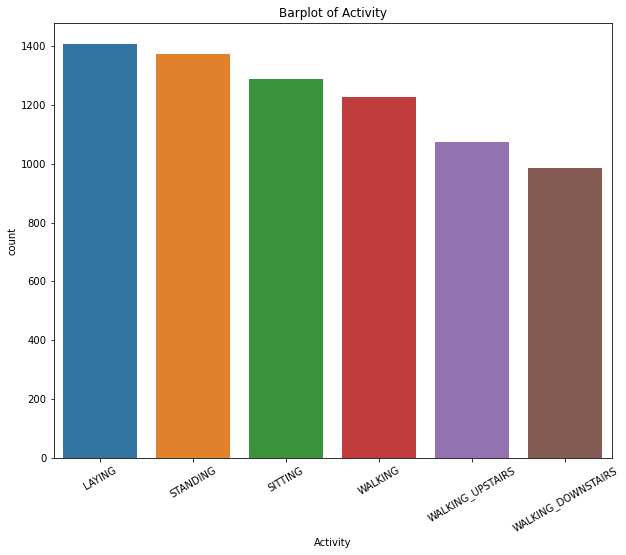

In [8]:
plt.figure(figsize = (10,8))
plt.title('Barplot of Activity')
sns.countplot(train.Activity, order = train.Activity.value_counts().index)
plt.xticks(rotation = 30)
plt.show()

#### There is almost same number of observations across all the six activities so this data does not have imbalance objects.

### What is DATA ANALYSIS?

#### What features are there?

In [9]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [10]:
Counter([col.split('-')[0].split('(')[0] for col in train.columns])

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [11]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient = "index").rename(columns = {0:'Counts'}).sort_values('Counts', ascending = False)

,Counts
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


#### Analysing tBodyAccMag-mean feature

Text(0.1, 9, 'Dynamic Activities')

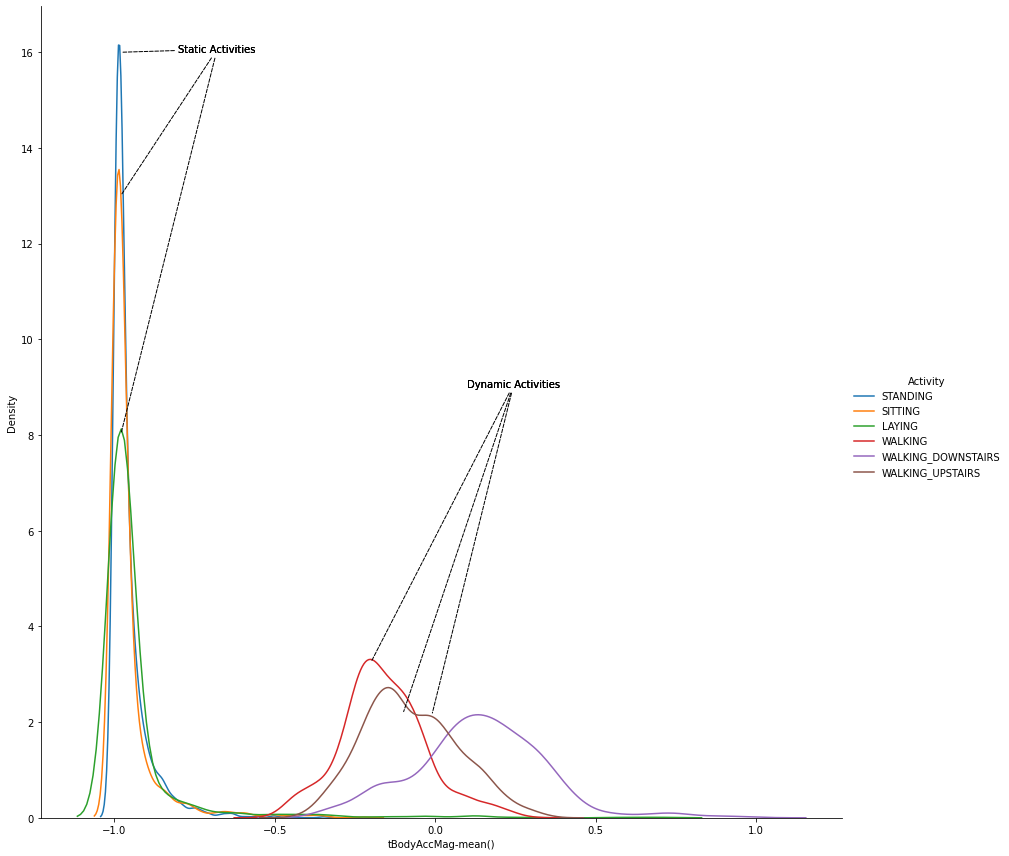

In [12]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 12, aspect = 1)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()
plt.annotate("Static Activities", xy = (-.98,8), xytext = (-.8,16), arrowprops = {'arrowstyle': '-','ls':'dashed'})
plt.annotate("Static Activities", xy = (-.98,13), xytext = (-.8,16), arrowprops = {'arrowstyle': '-','ls':'dashed'})
plt.annotate("Static Activities", xy = (-.98,16), xytext = (-.8,16), arrowprops = {'arrowstyle': '-','ls':'dashed'})

plt.annotate("Dynamic Activities", xy = (-0.2,3.25), xytext = (0.1,9), arrowprops = {'arrowstyle': '-','ls':'dashed'})
plt.annotate("Dynamic Activities", xy = (-0.1,2.18), xytext = (0.1,9), arrowprops = {'arrowstyle': '-','ls':'dashed'})
plt.annotate("Dynamic Activities", xy = (-0.01,2.15), xytext = (0.1,9), arrowprops = {'arrowstyle': '-','ls':'dashed'})

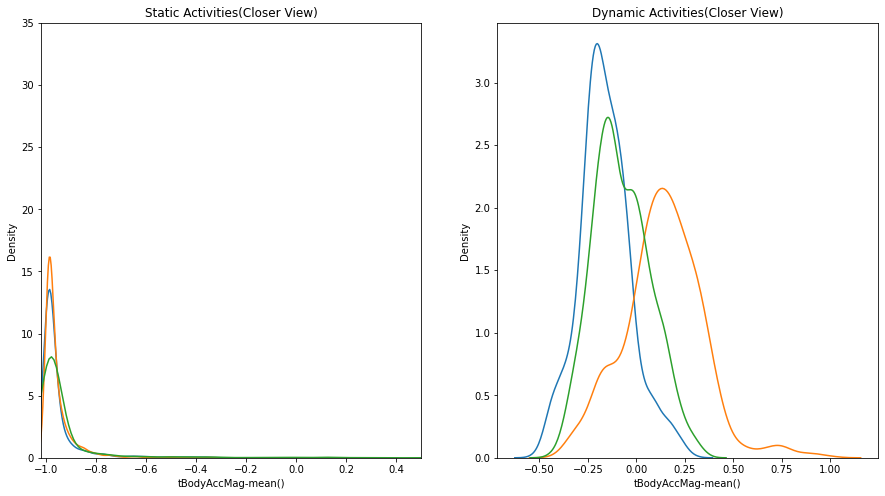

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title("Static Activities(Closer View)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'], hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'], hist = False, label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'], hist = False, label = 'Laying')
plt.axis([-1.02,0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(Closer View)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'], hist = False, label = 'Walking')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'], hist = False, label = 'Walking_Downstairs')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'], hist = False, label = 'Walking_Upstairs')
plt.show()

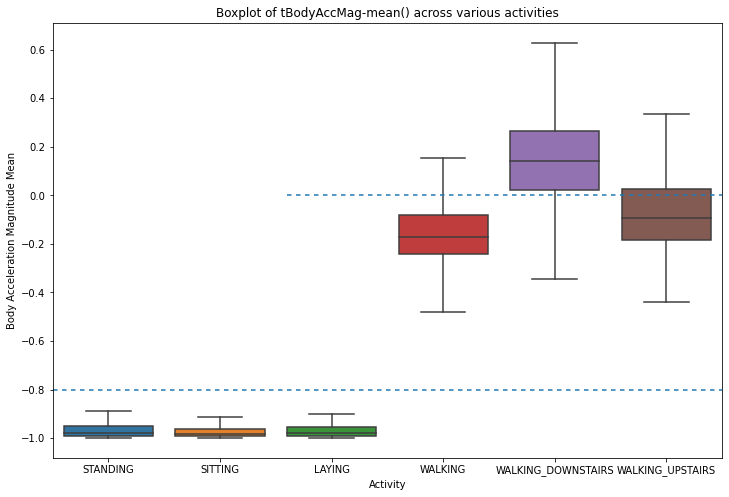

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Activity", y = "tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude Mean')
plt.title('Boxplot of tBodyAccMag-mean() across various activities')
plt.axhline(y = -0.8, xmin = 0.0, dashes = (3,3))
plt.axhline(y = 0.0, xmin = 0.35, dashes = (3,3))
plt.show()

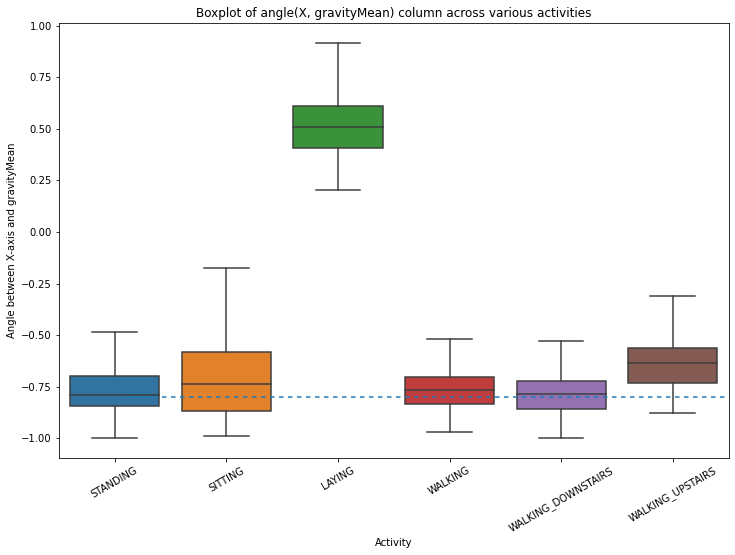

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Activity', y ='angle(X,gravityMean)', data = train, showfliers = False)
plt.axhline(y = -0.8, xmin = 0.1, dashes = (3,3))
plt.ylabel('Angle between X-axis and gravityMean')
plt.title('Boxplot of angle(X, gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

#### You can see how gravity acts in a different way when a body is laying.

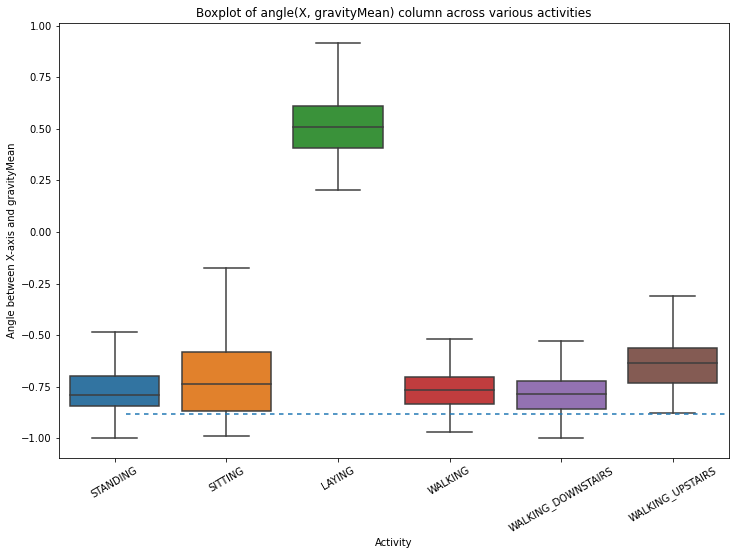

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Activity', y ='angle(X,gravityMean)', data = train, showfliers = False)
plt.axhline(y = -0.88, xmin = 0.1, dashes = (3,3))
plt.ylabel('Angle between X-axis and gravityMean')
plt.title('Boxplot of angle(X, gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

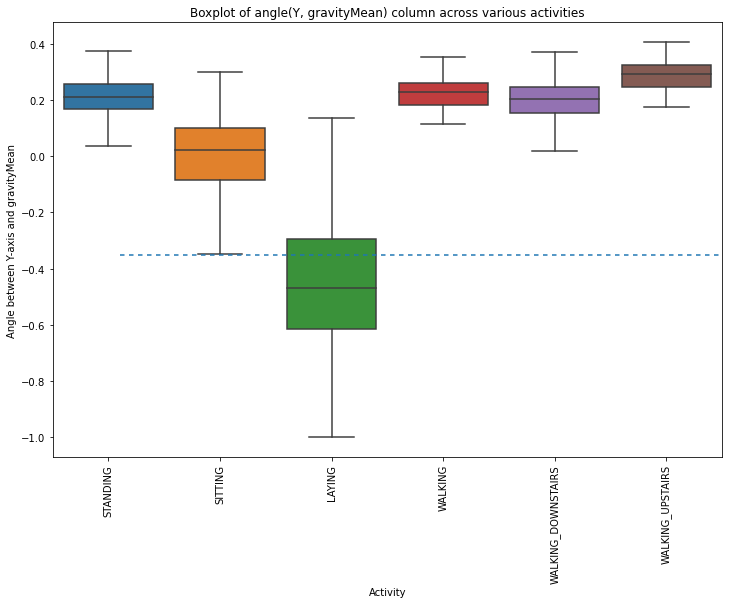

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Activity', y ='angle(Y,gravityMean)', data = train, showfliers = False)
plt.axhline(y = -0.35, xmin = 0.1, dashes = (3,3))
plt.ylabel('Angle between Y-axis and gravityMean')
plt.title('Boxplot of angle(Y, gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.show()

#### Similarly, we can differentiate between "Laying" and other movements. However, it again leads to some misclarification error.

## Visualising using PCA

#### Using PCA technique data can be visualized from an extremely high-dimensional space to a low-dimensional space while retaining most of its attributes. The given data has 561 unique features and we will try to visualise it in a 2-D space. Although, it is not possible to create visualisation for all the 561 features, PCA will convert them to some minimal number of attributes by which we can show the uniqueness of the attributes.

In [18]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components = 2, random_state = 0).fit_transform(x_for_pca)

In [19]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

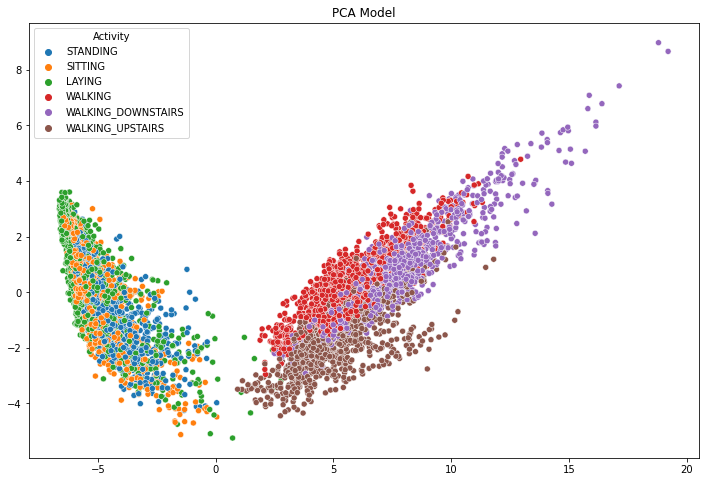

In [26]:
plt.figure(figsize=(12,8))
plt.title("PCA Model")
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show() 

## Visualising the data using a t-SNE Model.

#### Using t-SNE actual data can be brought from an extremely-high dimensional space to a low-dimensional space while retaining almost every information about the actual model. Let's validate the given data and visualise it in a 2-D space.

In [27]:
tsne

array([[ 63.4906   , -39.7206   ],
       [ 13.5708065, -39.372986 ],
       [ 16.88333  , -37.352337 ],
       ...,
       [ 60.73749  ,  14.081628 ],
       [ 60.48153  ,  14.081899 ],
       [ 59.754375 ,  14.62647  ]], dtype=float32)

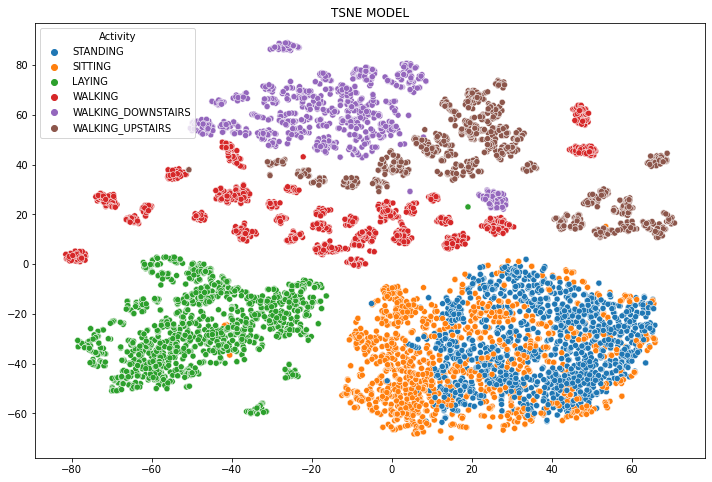

In [28]:
plt.figure(figsize=(12,8))
plt.title("TSNE MODEL")
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()  

## ML Model Preparations

In [29]:
x_train = train.drop(['subject','Activity'], axis = 1)
y_train = train.Activity

x_test = test.drop(['subject','Activity'], axis = 1)
y_test = test.Activity

In [30]:
print("Training Data Size:", x_train.shape)
print("Test Data Size:", x_test.shape)

Training Data Size: (7352, 561)
Test Data Size: (999, 561)


## Logistic Regression Model with Hyperparameter Tuning and Cross-Validation


In [31]:
parameters = {'max_iter': [100,200,500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 5, random_state = 42)
lr_classifier_rs.fit(x_train, y_train)
y_pred_lr = lr_classifier_rs.predict(x_test)

In [32]:
lr_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_lr)
print("Accuracy using Logistic Regression:", lr_accuracy)


Accuracy using Logistic Regression: 0.954954954954955


#### The accuracy using Logistic Regression Model is 95.5% approximately.

### Confusion Matrix creation for Cross Validation and Better Visualisation

#### Creating a function to plot Confusion Matrix

In [33]:
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xtickslabels=labels, yticklabels=labels,
           ylabel='True Label', 
           xlabel='Predicted Label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [34]:
cm = confusion_matrix(y_test.values, y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

#### Creating a function to get best randomsearch results

In [35]:
def get_best_randomsearch_results(model):
    print("Best estimator :", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    

In [36]:
get_best_randomsearch_results(lr_classifier_rs)

Best estimator : LogisticRegression(max_iter=500)
Best set of parameters :  {'max_iter': 500}


## Kernel SVM Model with Hyperparameter Testing and Cross Validation

In [37]:
parameters = {
    'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
    'C':[300, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state = 42)
svm_rs.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [300, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [38]:
y_pred = svm_rs.predict(x_test)

In [39]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.965965965965966


#### The Accuracy obtained usng the Kernel SVM Model is 96.5% approx.

## Decision Tree model with Hyperparameter tuning and Cross Validation

In [40]:
parameters = {'max_depth': np.arange(2, 10, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [41]:
y_pred = dt_classifier_rs.predict(x_test)

In [42]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision Tree: ", dt_accuracy)

Accuracy using Decision Tree:  0.8538538538538538


#### Using the Decision Tree model the accuracy is 83%.

In [43]:
get_best_randomsearch_results(dt_classifier_rs)

Best estimator : DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}


## Random Forest Model with Hyperparameter Tuning and Cross Validation.

In [44]:
parameters = {
    'n_estimators': np.arange(20, 101, 10),
    'max_depth': np.arange(2,17,2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions = parameters, random_state = 42)
rf_classifier_rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [46]:
get_best_randomsearch_results(rf_classifier_rs)

Best estimator : RandomForestClassifier(max_depth=12, n_estimators=70)
Best set of parameters :  {'n_estimators': 70, 'max_depth': 12}


In [45]:
y_pred = rf_classifier_rs.predict(x_test)

In [47]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random Forest: ", rf_accuracy)

Accuracy using Random Forest:  0.9169169169169169


#### Therefore, the accuracy obtained using Random Forest model is 91.6%.